### R4 Project: Ensemble Techniques: Parkinsons Disease
The data consists of those diagnosed with Parkinson Disease and those who do not.Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an
effective screening step prior to an appointment with a clinician.

#### 1. Import Libraries and Load the dataset

In [136]:
# Importing Libraries
import numpy as np # Linear Algebra
import pandas as pd # Data processing
import seaborn as sns # Data Visualization
from matplotlib import pyplot as plt # Data Visualization
import scipy.stats as stats # Data computing

In [137]:
# Read the dataset
Dataset_Df = pd.read_csv('parkinsons_data.csv', sep=',') 
Dataset_Df.columns = Dataset_Df.columns.str.replace(' ', '')
Dataset_Df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


#### 2. Eyeball the data - Number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset

In [138]:
# Check number of columns and rows
print('\033[1mWe have dataset with ', Dataset_Df.shape[1],' columns and ', Dataset_Df.shape[0], ' rows of data.')  

We have dataset with  24  columns and  195  rows of data.


In [139]:
#Check ratio of dataset wrto target class label 'status' column in this case.
print('\033[1mWe have data for ', Dataset_Df[Dataset_Df['status'] == 1].shape[0], 'PD patients and ', Dataset_Df[Dataset_Df['status'] == 0].shape[0],' healthy')

We have data for  147 PD patients and  48  healthy


In [140]:
Dataset_Df.info() # Check data type and null value count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

#### Inference:
* We have no null values and except 'name' all columns are numeric data type.

In [141]:
#finding unique data
Dataset_Df.apply(lambda x: len(x.unique()))

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

#### Inference:
* There are 23 columns and have unique values equivalent to number of patients(being decimal in nature).
* The dataset is of small size of 195 persons with more of PD patients (147 count) and few of healthy persons(48 count) and chance for high bias error.

In [142]:
#find minimum, maximum, average, standard deviation as well as quantile values with respect to each numeric column
Dataset_Df.describe().T.round(decimals=4)

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.2286,41.3901,88.3330,117.5720,148.7900,182.7690,260.1050
MDVP:Fhi(Hz),195.0,197.1049,91.4915,102.1450,134.8625,175.8290,224.2055,592.0300
MDVP:Flo(Hz),195.0,116.3246,43.5214,65.4760,84.2910,104.3150,140.0185,239.1700
MDVP:Jitter(%),195.0,0.0062,0.0048,0.0017,0.0035,0.0049,0.0074,0.0332
MDVP:Jitter(Abs),195.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0003
MDVP:RAP,195.0,0.0033,0.0030,0.0007,0.0017,0.0025,0.0038,0.0214
MDVP:PPQ,195.0,0.0034,0.0028,0.0009,0.0019,0.0027,0.0040,0.0196
Jitter:DDP,195.0,0.0099,0.0089,0.0020,0.0050,0.0075,0.0115,0.0643
MDVP:Shimmer,195.0,0.0297,0.0189,0.0095,0.0165,0.0230,0.0379,0.1191
MDVP:Shimmer(dB),195.0,0.2823,0.1949,0.0850,0.1485,0.2210,0.3500,1.3020


#### Inference:
* Observing skewed data columns. So lets check which are the relevant features/columns for model building and accordingly takeup for skewness treatment.

In [143]:
# Remove name columns as it irrelavant for model building
Dataset_Df = Dataset_Df.drop("name",axis = 1)
Dataset_Df.shape

(195, 23)

In [144]:
#Checking correlation
Dataset_Df.corr().round(decimals=2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.00,0.40,0.60,-0.12,-0.38,-0.08,-0.11,-0.08,-0.10,-0.07,...,-0.09,-0.02,0.06,-0.38,-0.38,-0.45,-0.41,-0.25,0.18,-0.37
MDVP:Fhi(Hz),0.40,1.00,0.08,0.10,-0.03,0.10,0.09,0.10,0.00,0.04,...,-0.00,0.16,-0.02,-0.17,-0.11,-0.34,-0.08,-0.00,0.18,-0.07
MDVP:Flo(Hz),0.60,0.08,1.00,-0.14,-0.28,-0.10,-0.10,-0.10,-0.14,-0.12,...,-0.15,-0.11,0.21,-0.38,-0.40,-0.05,-0.39,-0.24,-0.10,-0.34
MDVP:Jitter(%),-0.12,0.10,-0.14,1.00,0.94,0.99,0.97,0.99,0.77,0.80,...,0.75,0.91,-0.73,0.28,0.36,0.10,0.69,0.39,0.43,0.72
MDVP:Jitter(Abs),-0.38,-0.03,-0.28,0.94,1.00,0.92,0.90,0.92,0.70,0.72,...,0.70,0.83,-0.66,0.34,0.44,0.18,0.74,0.39,0.31,0.75
MDVP:RAP,-0.08,0.10,-0.10,0.99,0.92,1.00,0.96,1.00,0.76,0.79,...,0.74,0.92,-0.72,0.27,0.34,0.06,0.65,0.32,0.43,0.67
MDVP:PPQ,-0.11,0.09,-0.10,0.97,0.90,0.96,1.00,0.96,0.80,0.84,...,0.76,0.84,-0.73,0.29,0.33,0.20,0.72,0.41,0.41,0.77
Jitter:DDP,-0.08,0.10,-0.10,0.99,0.92,1.00,0.96,1.00,0.76,0.79,...,0.74,0.92,-0.72,0.27,0.34,0.06,0.65,0.32,0.43,0.67
MDVP:Shimmer,-0.10,0.00,-0.14,0.77,0.70,0.76,0.80,0.76,1.00,0.99,...,0.99,0.72,-0.84,0.37,0.45,0.16,0.65,0.45,0.51,0.69
MDVP:Shimmer(dB),-0.07,0.04,-0.12,0.80,0.72,0.79,0.84,0.79,0.99,1.00,...,0.96,0.74,-0.83,0.35,0.41,0.17,0.65,0.45,0.51,0.70


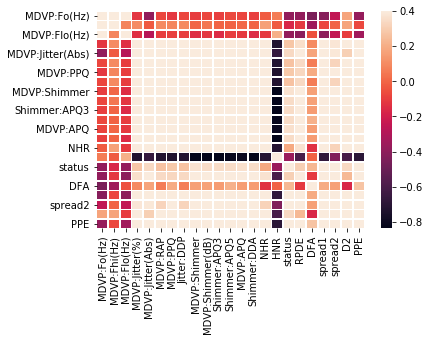

In [145]:
%matplotlib inline
sns.heatmap(Dataset_Df.corr(),vmax = 0.4, linewidths=.5)

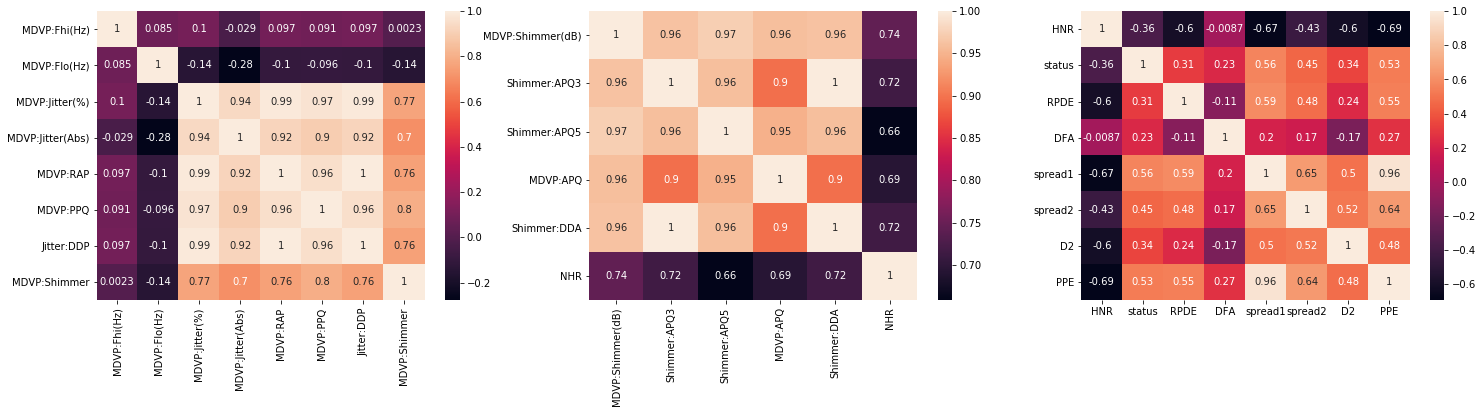

In [146]:
%matplotlib inline
plt.figure(figsize=(25,50))
plt.subplot(8,3,1)
sns.heatmap(Dataset_Df.iloc[:,1:9].corr(),annot=True)
plt.subplot(8,3,2)
sns.heatmap(Dataset_Df.iloc[:,9:15].corr(),annot=True)
plt.subplot(8,3,3)
sns.heatmap(Dataset_Df.iloc[:,15:24].corr(),annot=True)
plt.show()

#### Inference:
* We have many features which are highly corelated with each other like measures of variation in fundamental frequency(MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP )
* Highly corelated features that measures of variation in amplitude (MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA)
* Spread1 and PPE are also corelated.

#### 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails etc. What are your observations?

In [147]:
# Remove unwanted columns
# Keep spread1 and remove PPE
# Keep MDVP:PPQ and remove MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP
# Keep MDVP:Shimmer and remove MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
Dataset_Df = Dataset_Df.drop(['PPE', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'Jitter:DDP', 'MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'],axis = 1)
Dataset_Df.shape

(195, 13)

In [148]:
print('We have now below columns\n',*Dataset_Df.columns)

We have now below columns
 MDVP:Fo(Hz) MDVP:Fhi(Hz) MDVP:Flo(Hz) MDVP:PPQ MDVP:Shimmer NHR HNR status RPDE DFA spread1 spread2 D2


In [149]:
# correlation coefficient values in each attributes wrto to status.
correlation_values=Dataset_Df.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status          1.000000
spread1         0.564838
spread2         0.454842
MDVP:Fo(Hz)     0.383535
MDVP:Flo(Hz)    0.380200
MDVP:Shimmer    0.367430
HNR             0.361515
D2              0.340232
RPDE            0.308567
MDVP:PPQ        0.288698
DFA             0.231739
NHR             0.189429
MDVP:Fhi(Hz)    0.166136
Name: status, dtype: float64

#### Inference:
* We dont have feature columns that are highly correlated to target status label.

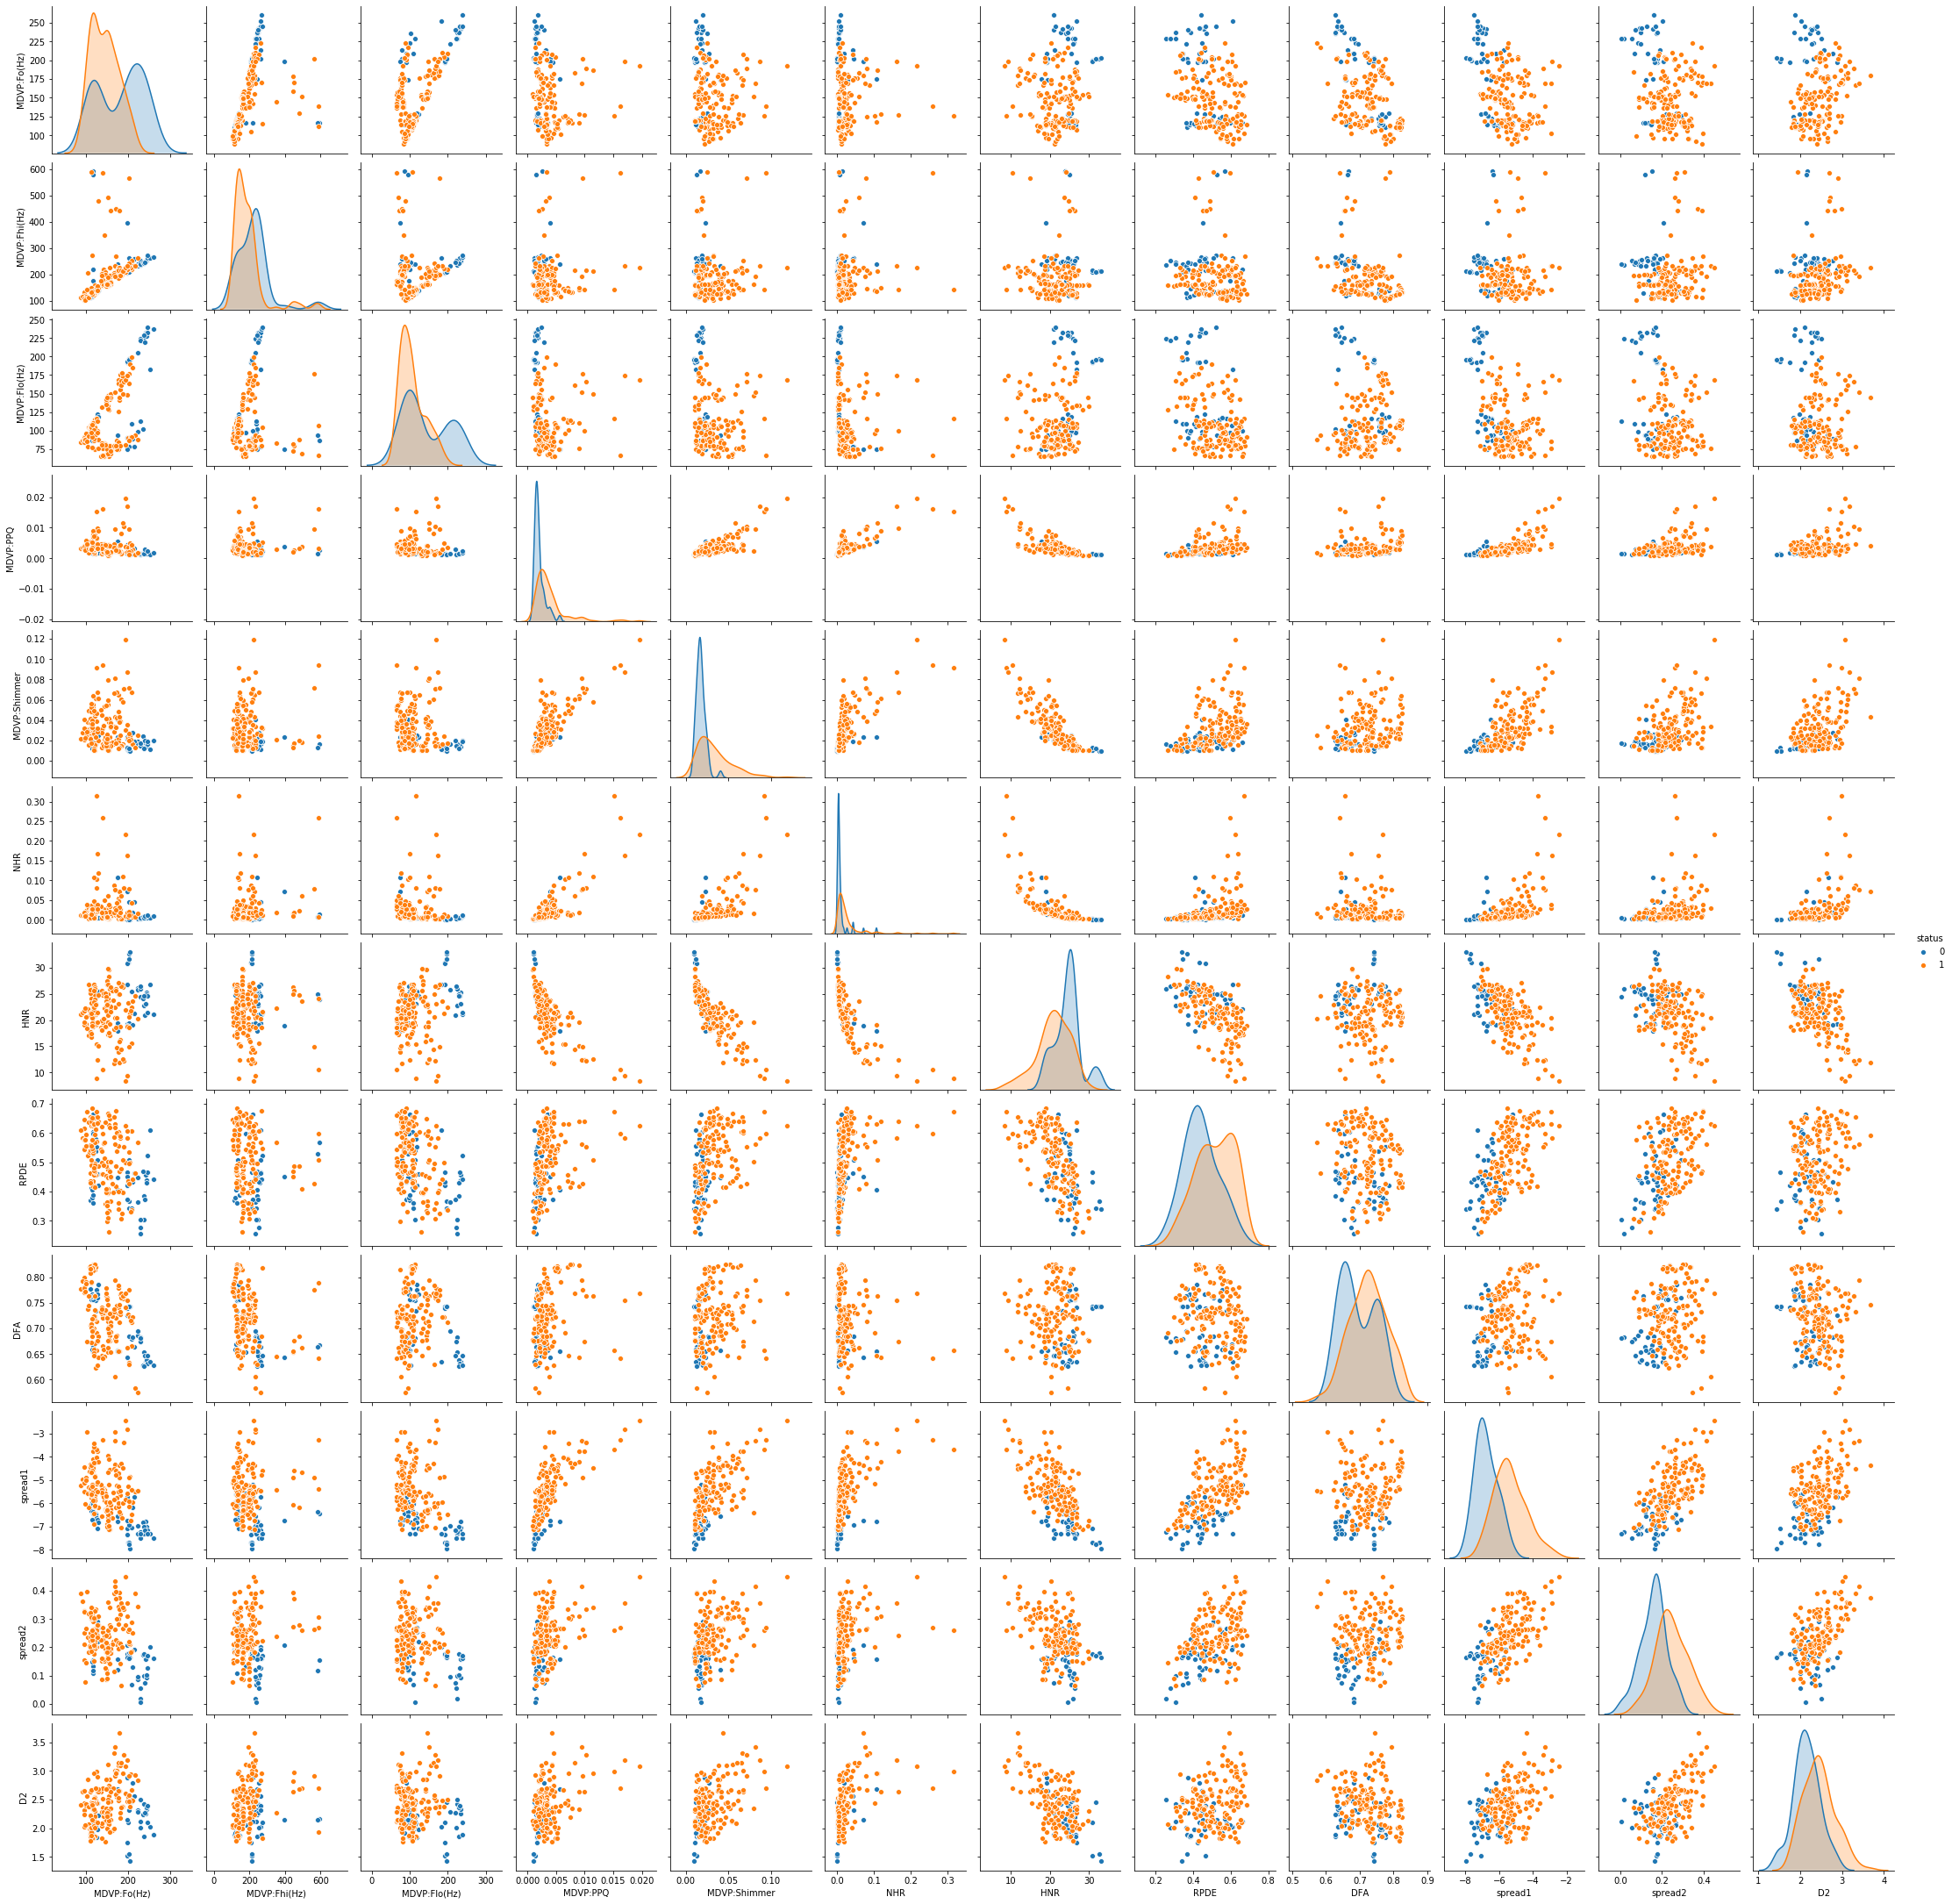

In [150]:
sns.pairplot(Dataset_Df,diag_kind = 'kde', hue = 'status') 
# Pair plot for visual interpret relation of the given attributes with the class label
plt.show()

#### Inference:
* Visually we will not be able to say which feature can clearly classify health status as they are overlapping.
* For some features skewness is high which need to be taken care.

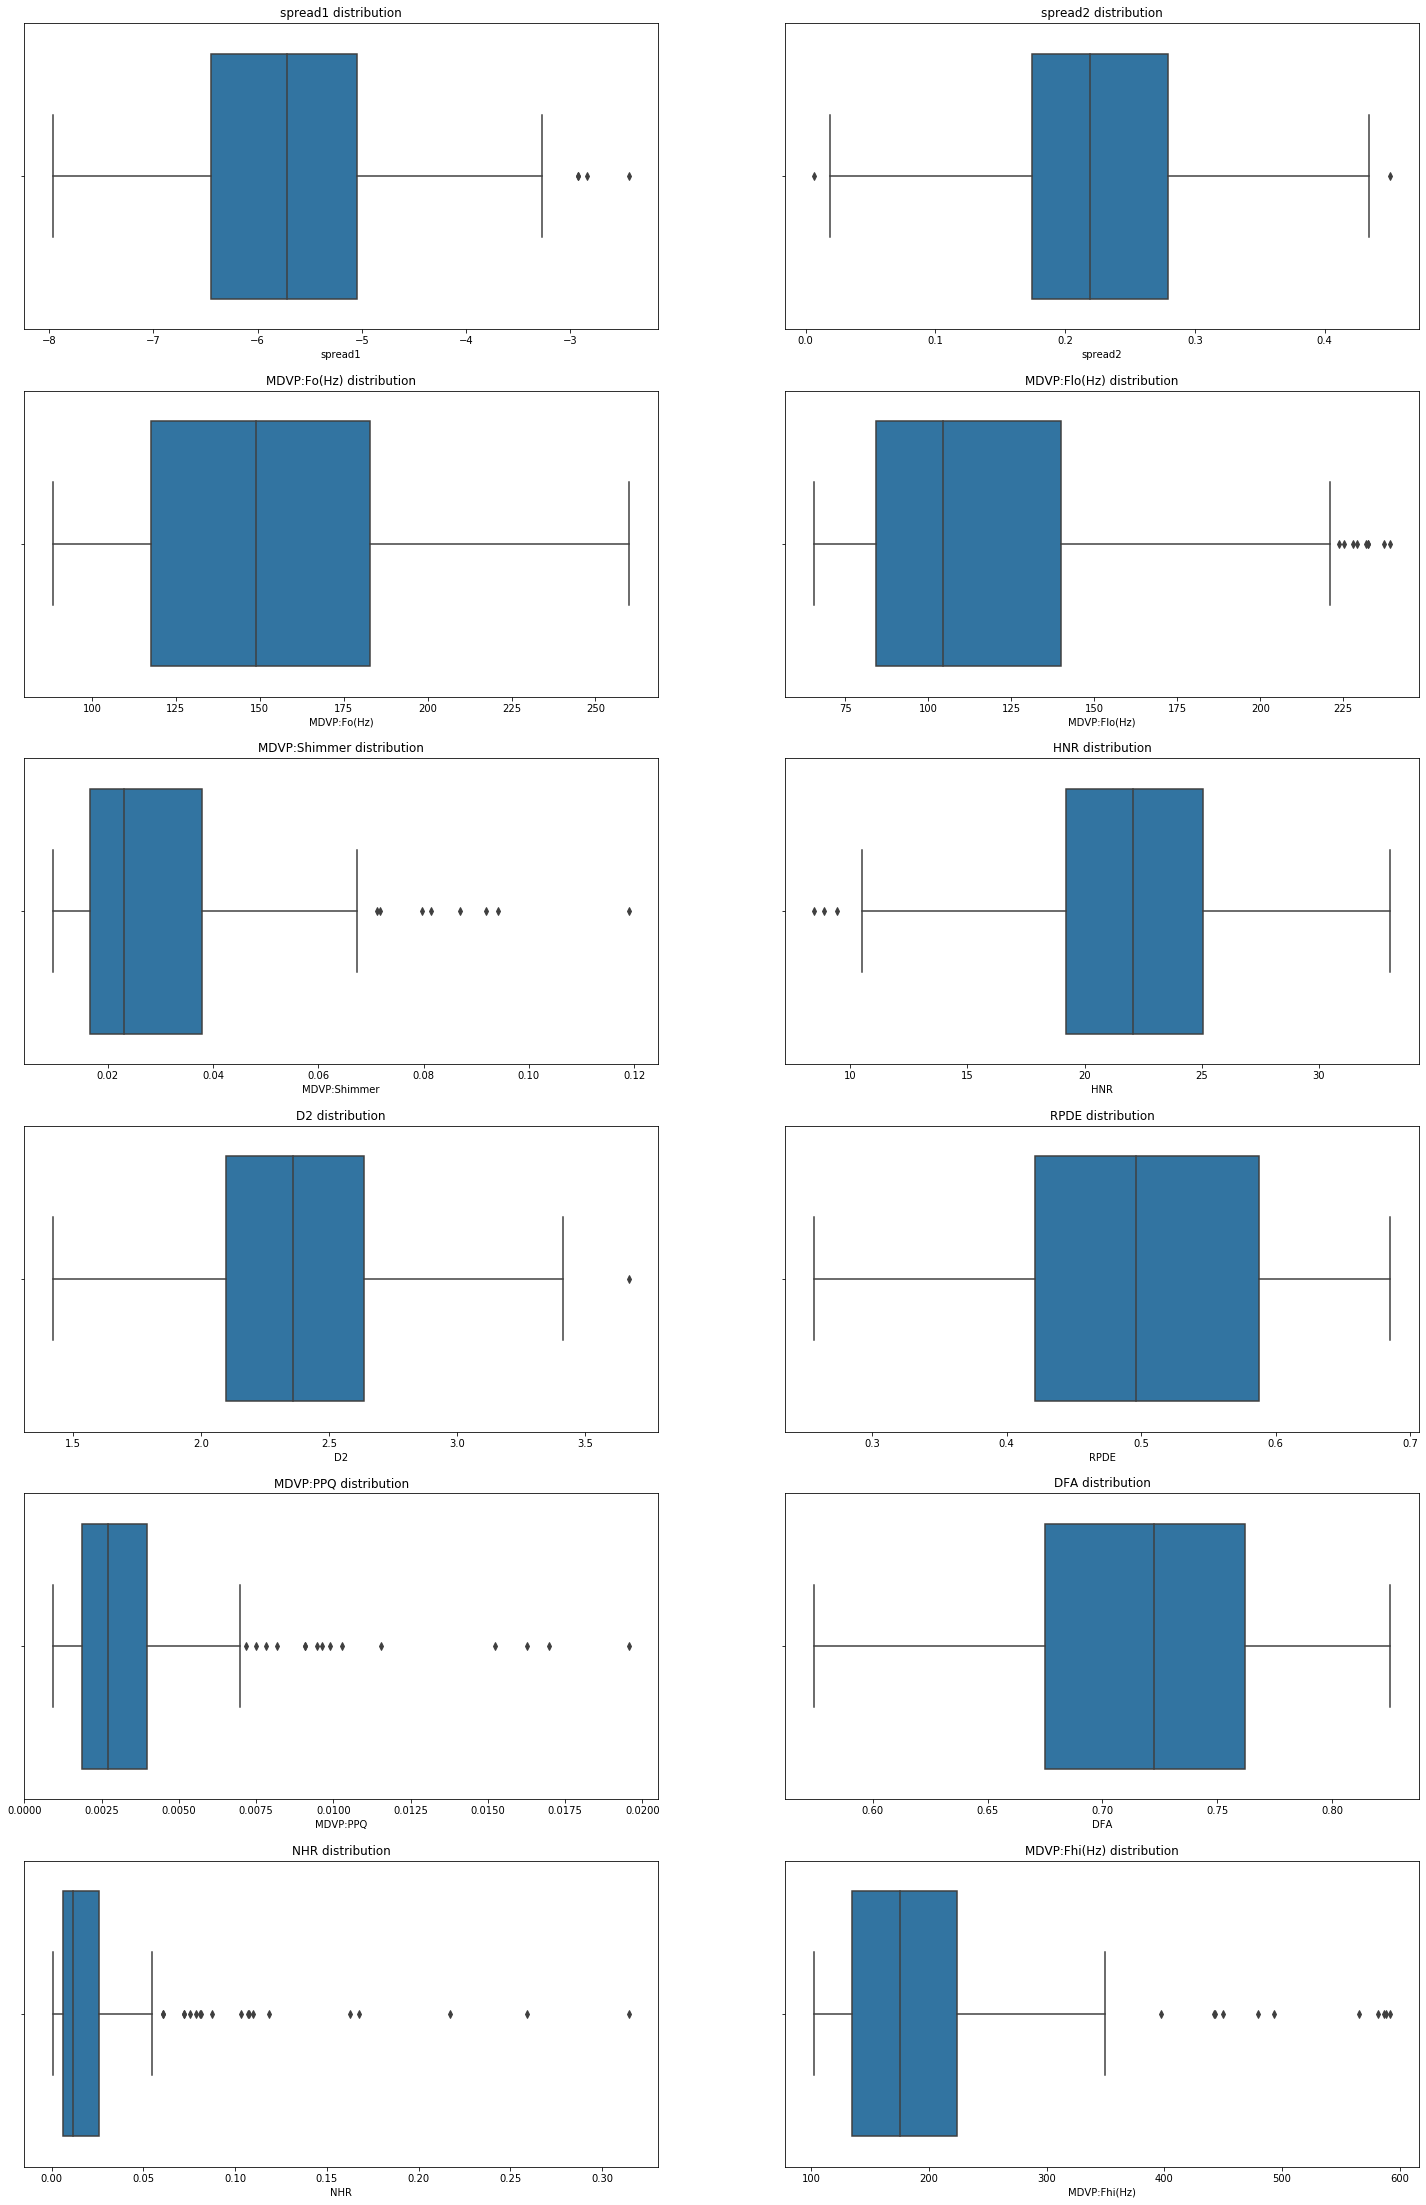

In [151]:
# checking spread based on corelation coefficient
plt.figure(figsize=(25,80))
plt.subplot(12,2,1)
sns.boxplot(x = 'spread1', data=Dataset_Df,orient='h')
plt.title('spread1 distribution')
plt.subplot(12,2,2)
sns.boxplot(x = 'spread2', data=Dataset_Df,orient='h')
plt.title('spread2 distribution')
plt.subplot(12,2,3)
sns.boxplot(x = 'MDVP:Fo(Hz)', data=Dataset_Df,orient='h')
plt.title('MDVP:Fo(Hz) distribution')
plt.subplot(12,2,4)
sns.boxplot(x = 'MDVP:Flo(Hz)', data=Dataset_Df,orient='h')
plt.title('MDVP:Flo(Hz) distribution')
plt.subplot(12,2,5)
sns.boxplot(x = 'MDVP:Shimmer', data=Dataset_Df,orient='h')
plt.title('MDVP:Shimmer distribution')
plt.subplot(12,2,6)
sns.boxplot(x = 'HNR', data=Dataset_Df,orient='h')
plt.title('HNR distribution')
plt.subplot(12,2,7)
sns.boxplot(x = 'D2', data=Dataset_Df,orient='h')
plt.title('D2 distribution')
plt.subplot(12,2,8)
sns.boxplot(x = 'RPDE', data=Dataset_Df,orient='h')
plt.title('RPDE distribution')
plt.subplot(12,2,9)
sns.boxplot(x = 'MDVP:PPQ', data=Dataset_Df,orient='h')
plt.title('MDVP:PPQ distribution')
plt.subplot(12,2,10)
sns.boxplot(x = 'DFA', data=Dataset_Df,orient='h')
plt.title('DFA distribution')
plt.subplot(12,2,11)
sns.boxplot(x = 'NHR', data=Dataset_Df,orient='h')
plt.title('NHR distribution')
plt.subplot(12,2,12)
sns.boxplot(x = 'MDVP:Fhi(Hz)', data=Dataset_Df,orient='h')
plt.title('MDVP:Fhi(Hz) distribution')
plt.show()

#### Inference:
* NHR, MDVP:PPQ MDVP:Fhi(Hz) has highly right skewed which needs to be treated.
* MDVP:Shimmer has outliers which needs to be treated

In [152]:
# Creating scaled dataset for model
import copy
Df = copy.deepcopy(Dataset_Df)

In [153]:
#Treating skewness of NHR, MDVP:PPQ column using log transformation
Df['log_NHR'] = np.log(Df['NHR'])
Df['log_MDVP:PPQ'] = np.log(Df['MDVP:PPQ'])
Df['log_MDVP:Fhi'] = np.log(Df['MDVP:Fhi(Hz)'])

In [154]:
Df =  Df.drop(['NHR', 'MDVP:PPQ','MDVP:Fhi(Hz)'], axis=1) # Keeping log transformed of the respective column

In [155]:
#Treating for MDVP:Shimmer
#Treating outliers 
from scipy import stats
Df['Scaled_MDVP:Shimmer'] = np.abs(stats.zscore(Df['MDVP:Shimmer']))
Df=Df[Df['Scaled_MDVP:Shimmer']<3]
Df.drop('Scaled_MDVP:Shimmer',axis =1, inplace = True)
Df.shape

(191, 13)

In [156]:
Df.groupby(Df['status']).mean() #Check distribution of features on target

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2,log_NHR,log_MDVP:PPQ,log_MDVP:Fhi
status,,,,,,,,,,,,
0,181.937771,145.207292,0.017615,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,-5.082097,-6.266545,5.336886
1,144.655755,106.206846,0.031859,21.300273,0.513946,0.725972,-5.396985,0.245718,2.441226,-4.192244,-5.782691,5.156248


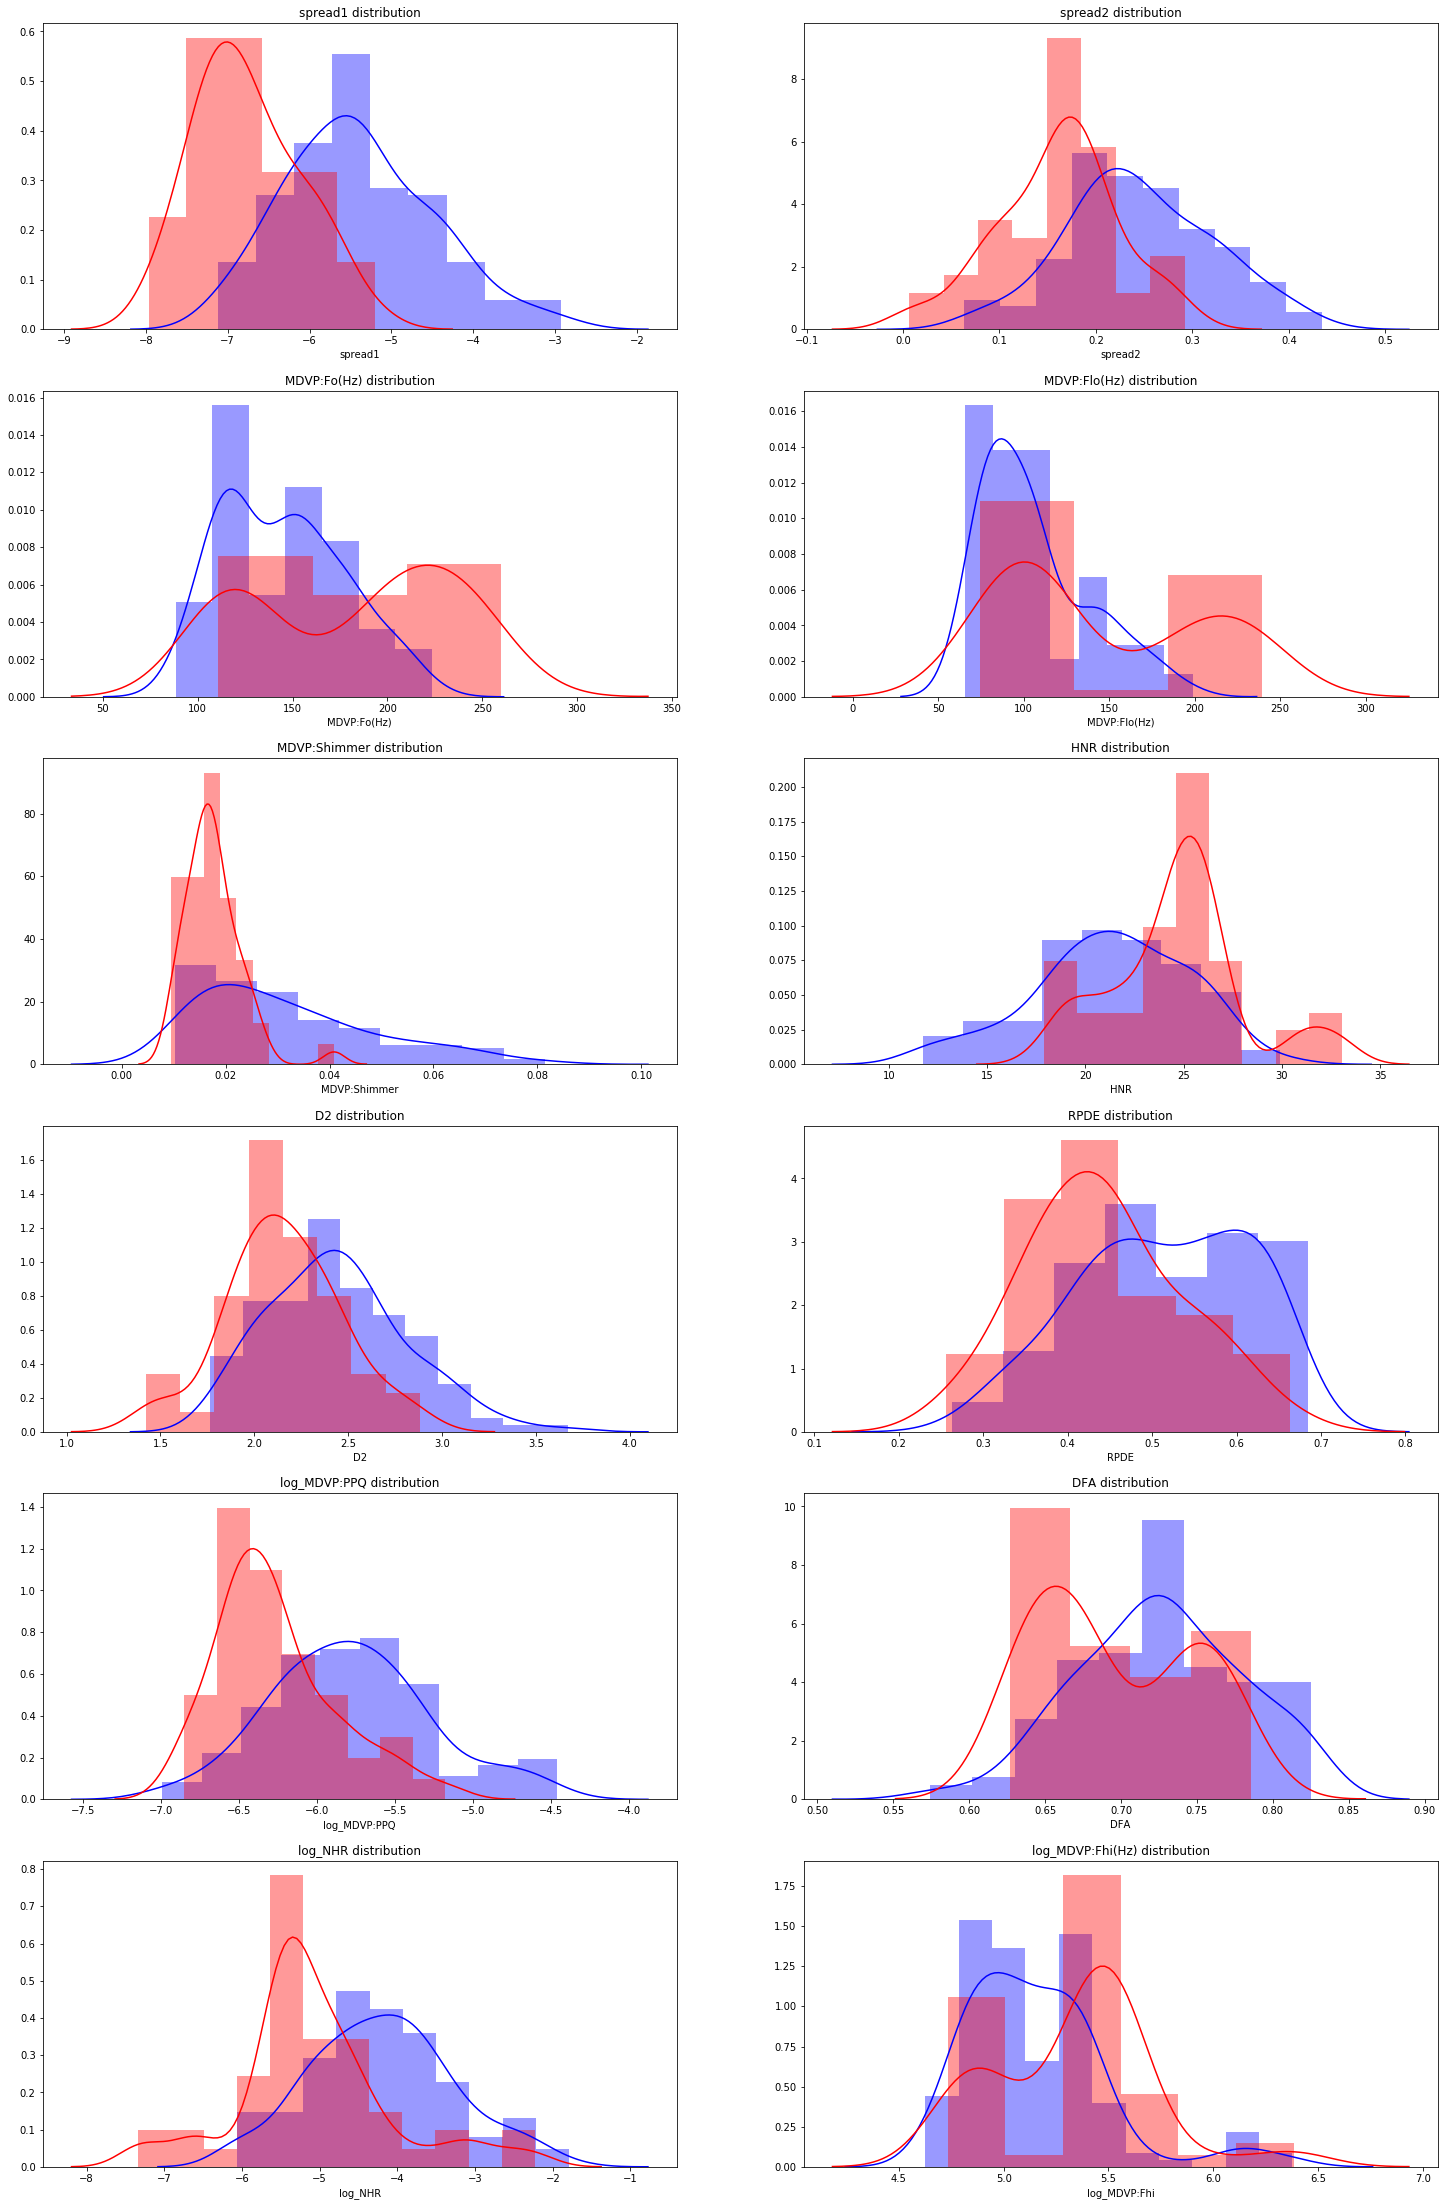

In [157]:
#checking the distribution of feature columns after preprocessing treatment
plt.figure(figsize=(25,80))
plt.subplot(12,2,1)
sns.distplot( Df[Df["status"] == 1].spread1, color="blue", label="spread1")
sns.distplot( Df[Df["status"] == 0].spread1, color="red", label="spread1")
plt.title('spread1 distribution')
plt.subplot(12,2,2)
sns.distplot( Df[Df["status"] == 1].spread2, color="blue", label="spread2")
sns.distplot( Df[Df["status"] == 0].spread2, color="red", label="spread2")
plt.title('spread2 distribution')
plt.subplot(12,2,3)
sns.distplot( Df[Df["status"] == 1]['MDVP:Fo(Hz)'], color="blue", label="MDVP:Fo(Hz)")
sns.distplot( Df[Df["status"] == 0]['MDVP:Fo(Hz)'], color="red", label="MDVP:Fo(Hz)")
plt.title('MDVP:Fo(Hz) distribution')
plt.subplot(12,2,4)
sns.distplot( Df[Df["status"] == 1]['MDVP:Flo(Hz)'], color="blue", label="MDVP:Flo(Hz)")
sns.distplot( Df[Df["status"] == 0]['MDVP:Flo(Hz)'], color="red", label="MDVP:Flo(Hz)")
plt.title('MDVP:Flo(Hz) distribution')
plt.subplot(12,2,5)
sns.distplot( Df[Df["status"] == 1]['MDVP:Shimmer'], color="blue", label="MDVP:Shimmer")
sns.distplot( Df[Df["status"] == 0]['MDVP:Shimmer'], color="red", label="MDVP:Shimmer")
plt.title('MDVP:Shimmer distribution')
plt.subplot(12,2,6)
sns.distplot( Df[Df["status"] == 1].HNR, color="blue", label="HNR")
sns.distplot( Df[Df["status"] == 0].HNR, color="red", label="HNR")
plt.title('HNR distribution')
plt.subplot(12,2,7)
sns.distplot( Df[Df["status"] == 1].D2, color="blue", label="D2")
sns.distplot( Df[Df["status"] == 0].D2, color="red", label="D2")
plt.title('D2 distribution')
plt.subplot(12,2,8)
sns.distplot( Df[Df["status"] == 1].RPDE, color="blue", label="RPDE")
sns.distplot( Df[Df["status"] == 0].RPDE, color="red", label="RPDE")
plt.title('RPDE distribution')
plt.subplot(12,2,9)
sns.distplot( Df[Df["status"] == 1]['log_MDVP:PPQ'], color="blue", label="log_MDVP:PPQ")
sns.distplot( Df[Df["status"] == 0]['log_MDVP:PPQ'], color="red", label="log_MDVP:PPQ")
plt.title('log_MDVP:PPQ distribution')
plt.subplot(12,2,10)
sns.distplot( Df[Df["status"] == 1].DFA, color="blue", label="DFA")
sns.distplot( Df[Df["status"] == 0].DFA, color="red", label="DFA")
plt.title('DFA distribution')
plt.subplot(12,2,11)
sns.distplot( Df[Df["status"] == 1]['log_NHR'], color="blue", label="log_NHR")
sns.distplot( Df[Df["status"] == 0]['log_NHR'], color="red", label="log_NHR")
plt.title('log_NHR distribution')
plt.subplot(12,2,12)
sns.distplot( Df[Df["status"] == 1]['log_MDVP:Fhi'], color="blue", label="log_MDVP:Fhi(Hz)")
sns.distplot( Df[Df["status"] == 0]['log_MDVP:Fhi'], color="red", label="log_MDVP:Fhi(Hz)")
plt.title('log_MDVP:Fhi(Hz) distribution')
plt.show()

#### Inference:
* We now have 12 features for our model
* Dataset treated for outliers,skewned and checked for no missing value, null value to proceed further.
* Lets find how decision tree classifier can help in predicting the person as healthy or unhealthy.

#### 4. Create a decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [158]:
# splitting attributes and output label
X =  Df.drop("status", axis=1)
y =  Df.pop("status")

In [159]:
#Creating split for training and test dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1) #split dataset to training and test in 70:30 ratio
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)


In [160]:
# Creating decision tree model using entropy with scaled training dataset
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

dt_full = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_full.fit(scaledX_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [161]:
print("\033[1mTraining Accuracy with DT full depth model: %1.2f percent" %(dt_full.score(scaledX_train,y_train)*100))
print("\033[1mTesting Accuracy with DT full depth model: %1.2f percent" %(dt_full.score(scaledX_test,y_test)*100))

Training Accuracy with DT full depth model: 100.00 percent
Testing Accuracy with DT full depth model: 91.38 percent


#### Inference:
* Using decision tree full depth model eventhough 100% accuracy is achieved for training set, the accuracy falls to 91.38% when model is tested on test dataset.

#### 5. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab


               precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.91      0.98      0.94        43

    accuracy                           0.91        58
   macro avg       0.91      0.86      0.88        58
weighted avg       0.91      0.91      0.91        58



<function matplotlib.pyplot.show(*args, **kw)>

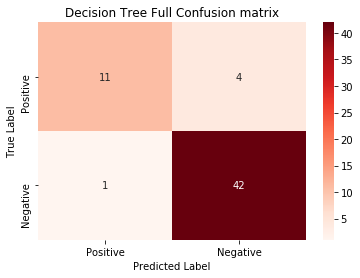

In [162]:
# capture predicted values and mapping them in confusion matrix
predicted = dt_full.predict(scaledX_test) # Capture Predicted class
print('\n', classification_report(y_test,predicted))
cm_dt = confusion_matrix(y_test,predicted) # crosstab for actual and predicted class
class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm_dt, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap="Reds")
plt.title("Decision Tree Full Confusion matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show

#### Inference:
* Case being detecting person for disease, we need to have better recall. We have recall of 98% meaning model is able to detect 98% of actual unhealthy person with PD.
* However of actual healthy person, model wrongly classifies 27% as unhealthy affected by PD.

In [168]:
# Testing the above model using cross validation for different random state.
from sklearn.model_selection import cross_val_score
score_dt_full = cross_val_score(dt_full, scaledX_train, y_train, cv=10, scoring='accuracy')
print("\033[1mTrain set accuracy achieved using DT full model: %1.2f percent" %(dt_full.score(scaledX_train, y_train)*100))
print("\033[1mAverage test set accuracy achieved using DT full model: %1.2f percent" %(np.mean(score_dt_full)*100))

Train set accuracy achieved using DT full model: 100.00 percent
Average test set accuracy achieved using DT full model: 85.05 percent


In [198]:
#Checking variance and bias error
trainscore_dt_full =np.round(dt_full.score(scaledX_train, y_train)*100, decimals=3)
avgscore_dt_full = np.round(np.mean(score_dt_full)*100, decimals=3)
ve_dt_full = np.round(np.std(score_dt_full)*100, decimals=3)
be_dt_full = np.round((1-np.mean(score_dt_full))*100, decimals=3)
print("\033[1mUsing Decision Tree Full Depth Model:")
print("\033[1mVariance Error: %1.3f" %np.std(score_dt_full))
print("\033[1mBias Error :%1.3f" %(1-np.mean(score_dt_full)))

Using Decision Tree Full Depth Model:
Variance Error: 0.074
Bias Error :0.149


In [171]:
#Checing the features that are treated importance by our DT full depth model
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(dt_full.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
6,spread1,0.359
0,MDVP:Fo(Hz),0.341
2,MDVP:Shimmer,0.173
3,HNR,0.097
4,RPDE,0.030
1,MDVP:Flo(Hz),0.000
5,DFA,0.000
7,spread2,0.000
8,D2,0.000
9,log_NHR,0.000


#### Inference:
* We have  spread1, MDVP:Fo(Hz), MDVP:Shimmer, HNR, RPDE in order as important features in building the DT full depth model.
* Bias error is high as decision tree is biased to some features and we can observe this in feature importance table above.

In [172]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['1', '2']
pd_Tree_File = open('pd_tree.dot','w')
dot_data = tree.export_graphviz(dt_full, out_file=pd_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

pd_Tree_File.close()

#### Note:
* !dot -Tpng pd_tree.dot -o pd_tree.png -- did not work and hence copied the script in the .dot file and pasted it at http://webgraphviz.com/ to get tree view 
* saved the same in .png as below

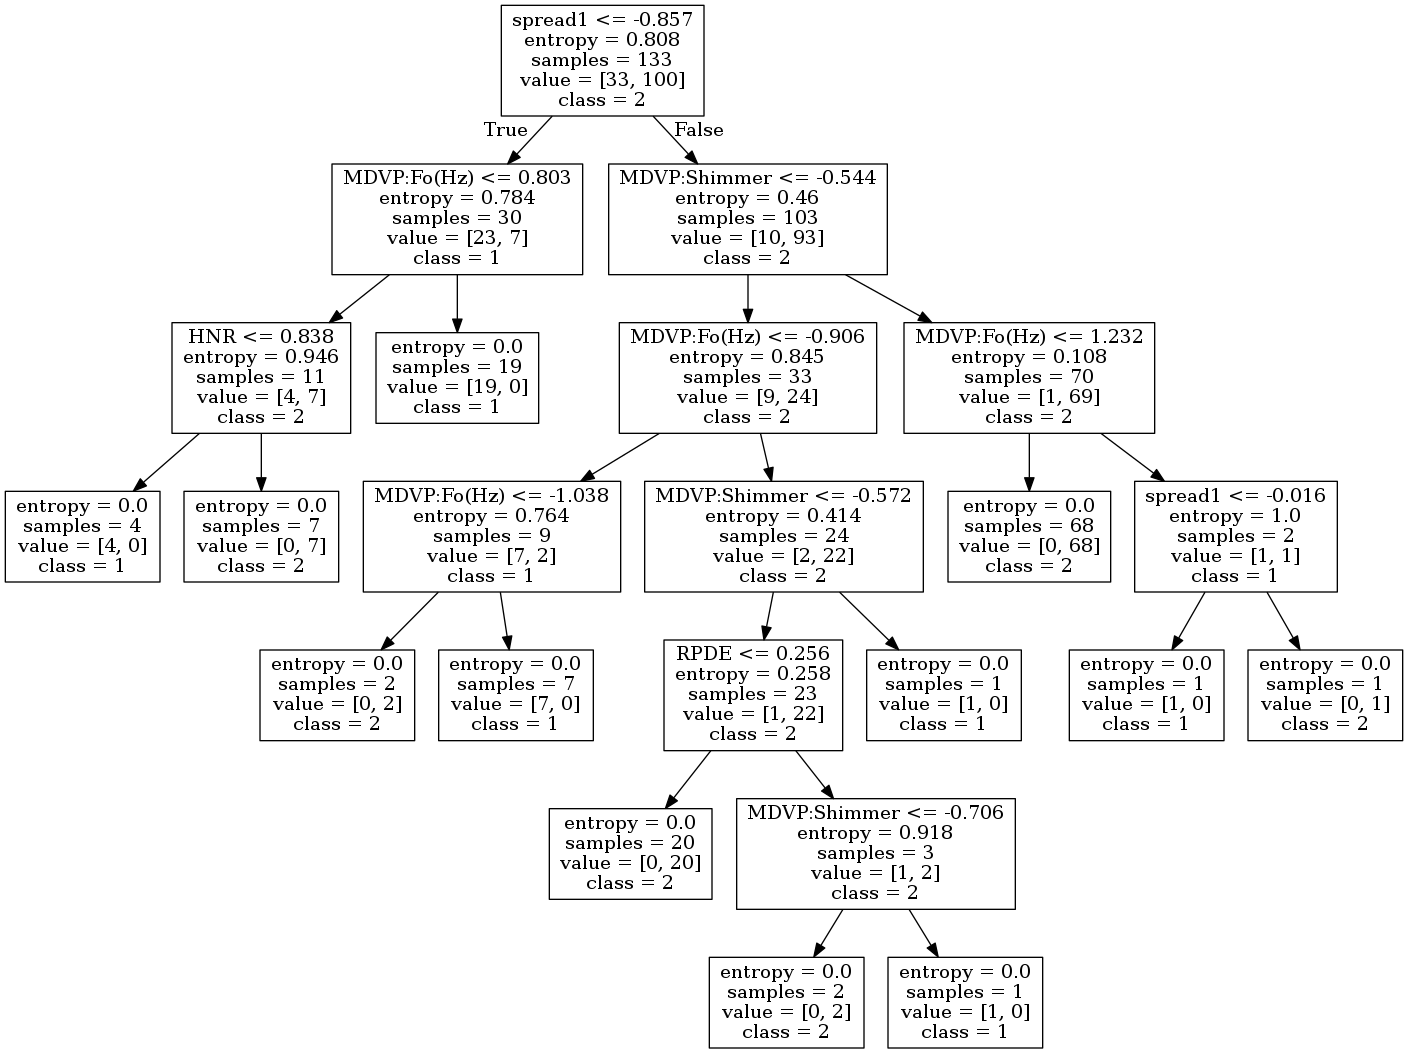

In [173]:
from IPython.display import Image
Image("pd_tree.png")

#### Inference:
* With full depth decision tree model we have entropy of 0.808 obtained at root node.
* We have leaf node at depth 2 as well.
* Leaf node has samples 0 in one of the value which makes model to Overfit. 
* Due to this overfitting, model that offered 100% accuracy on train dataset is able to offer only 84.55% accuracy on test dataset.
* So lets regularize hyperparameters of the model to get a Good Fit.

#### 6. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help

In [174]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))# List to store the average RMSE for each value of max_depth:
test_accuracy = []
train_accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth,min_samples_leaf=2,random_state = 10)
    clf.fit(scaledX_train, y_train)    
    test_score = clf.score(scaledX_test, y_test)
    train_score = clf.score(scaledX_train, y_train)
    test_accuracy.append(np.round(test_score*100,2))
    train_accuracy.append(np.round(train_score*100,2))

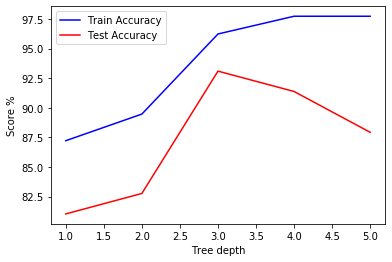

In [175]:
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(1, 5, 5, endpoint=True)
line1, = plt.plot(max_depths, train_accuracy, 'b', label="Train Accuracy")
line2, = plt.plot(max_depths, test_accuracy, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=1)})
plt.ylabel('Score %')
plt.xlabel('Tree depth')
plt.show()

#### Inference:
* With tree depth = 3 we would get a good fit decision tree model where we have optimum training and test accuracy.

In [176]:
#creating regularized decision tree model with above hyperparameters to DT classifier    
dt_reg = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3 , min_samples_leaf=1, random_state =1 )
dt_reg.fit(scaledX_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [177]:
print("\033[1mTraining Accuracy with regularized DT model: %1.2f percent" %(dt_reg.score(scaledX_train,y_train)*100))
print("\033[1mTesting Accuracy with regularized DT model: %1.2f percent" %(dt_reg.score(scaledX_test,y_test)*100))

Training Accuracy with regularized DT model: 96.24 percent
Testing Accuracy with regularized DT model: 93.10 percent



               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.95        43

    accuracy                           0.93        58
   macro avg       0.93      0.89      0.91        58
weighted avg       0.93      0.93      0.93        58



<function matplotlib.pyplot.show(*args, **kw)>

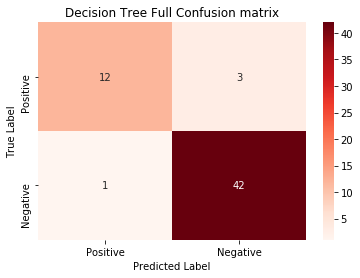

In [178]:
# capture predicted values and mapping them in confusion matrix
predicted = dt_reg.predict(scaledX_test)
print('\n', classification_report(y_test,predicted))
cm_dt = confusion_matrix(y_test,predicted)
class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm_dt, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap="Reds")
plt.title("Decision Tree Full Confusion matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show

In [179]:
# Testing the above model using cross validation for different random state.
from sklearn.model_selection import cross_val_score
score_dt_reg = cross_val_score(dt_reg, scaledX_train, y_train, cv=10, scoring='accuracy')
print("\033[1mAverage train accuracy achieved using regularized DT model: %1.2f percent" %(dt_reg.score(scaledX_train, y_train)*100))
print("\033[1mAverage test accuracy achieved using regularized DT model: %1.2f percent" %(np.mean(score_dt_reg)*100))

Average train accuracy achieved using regularized DT model: 96.24 percent
Average test accuracy achieved using regularized DT model: 87.97 percent


In [197]:
#Checking variance and bias error
trainscore_dt_reg =np.round(dt_reg.score(scaledX_train, y_train)*100, decimals=3)
avgscore_dt_reg = np.round(np.mean(score_dt_reg)*100, decimals=3)
ve_dt_reg = np.round(np.std(score_dt_reg)*100, decimals=3)
be_dt_reg = np.round((1-np.mean(score_dt_reg))*100, decimals=3)
print("\033[1mUsing Regularized Decision Tree Model with max depth = 3 and min_samples_leaf=1:")
print("\033[1mVariance Error: %1.3f" %np.std(score_dt_reg))
print("\033[1mBias Error :%1.3f" %(1-np.mean(score_dt_reg)))

Using Regularized Decision Tree Model with max depth = 3 and min_samples_leaf=1:
Variance Error: 0.078
Bias Error :0.120


In [181]:
#Checing the features that are treated importance by our DT regularized model
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(dt_reg.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
6,spread1,0.413
0,MDVP:Fo(Hz),0.336
2,MDVP:Shimmer,0.134
3,HNR,0.117
1,MDVP:Flo(Hz),0.000
4,RPDE,0.000
5,DFA,0.000
7,spread2,0.000
8,D2,0.000
9,log_NHR,0.000


#### Inference:
* Now we have model giving importance to only four features - spread1, MDVP:Fo(Hz), MDVP:Shimmer and HNR as important features in regularized model to detect.
* Both the decision tree model is built givng importance to some features and hence there is still chance of overfitting. This can be avoided using RandomForest bagging technique where multiple decision tree model instance is been created using dataset bootstrapped on feature selection and datarows.

In [182]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['1', '2']
pd_reg_Tree_File = open('pd_reg_tree.dot','w')
dot_data = tree.export_graphviz(dt_reg, out_file=pd_reg_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

pd_Tree_File.close()

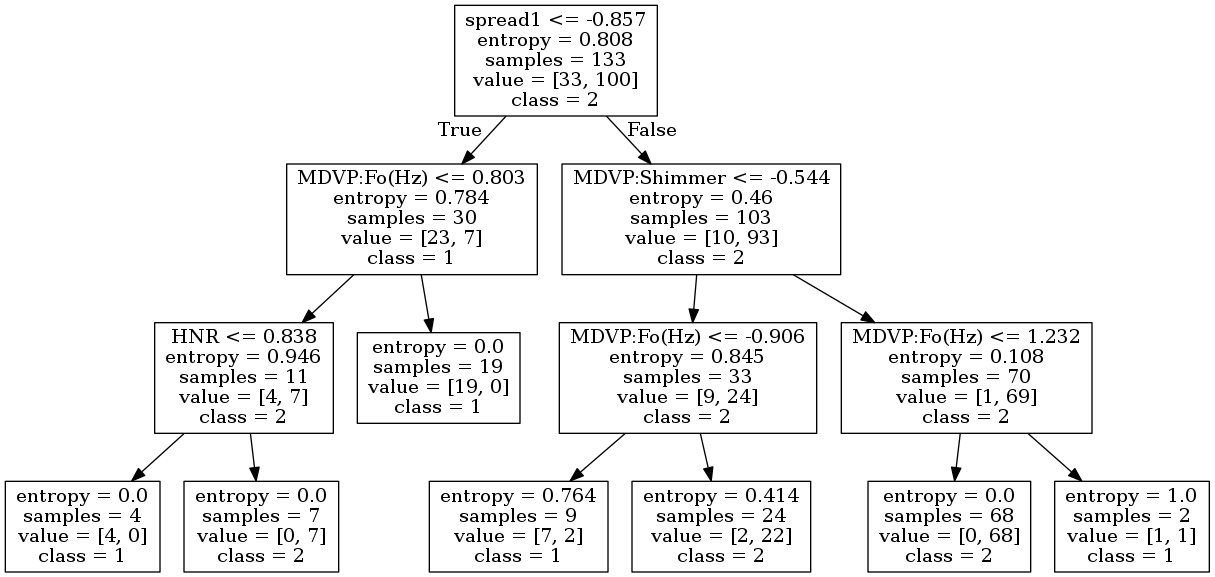

In [183]:
Image("pd_reg_tree.png") # Regularized decision tree model

#### Inference:
* An ideal model generated from this training data should be able to generalize well meaning it should learn from the training data and should correctly predict or classify data within any new problem instance. Decision tree model full depth the tree continued to fit till each data point is a different leaf in the tree. However DT full depth model performed perfectly well on train set but fails badly on test set or validation set in most cases that indicated that the model is overfitting, meaning it just does not generalize well enough and thus simply learns perfectly well how to make predictions on a particular set of samples, but with new feed some data, the performance goes down drastically.
* This overfitting can be reduced by restricting decision tree model to getting more complex. This is done by regularization of the decision tree model.This we did by using hyperparameters of the decision tree classifier tuned by restricting maximum depth and minimum sample leaf. The earlier accuracy difference obtained from training and test dataset was reduced with this regularization technique and was able to get a good fit model.
* Also this action reduced the variance error from 9.7% to further 6.4%. However, there is increase in bias error from 15.4% to 16.3%. Further tuning can lead to bias error and get the model to underfit. Keeping Bias-Variance trade-off the accuracy achieved with our regularized decision tree model was 83.72% with variance of 6.4%.
* In order to further reduce this variance we use ensemble bagging technique. Random Forest is extended bagging technique which is basically a voting process to predict/detct from output of among various decision tree model created from different data instances of the same training dataset.

#### 7. Next implement the Random Forest model and find the accuracy

In [211]:
#Getting the best n_estimator
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# creating odd list of k
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
n_estimators = []
for k in myList:
    rf = RandomForestClassifier(criterion='entropy', min_samples_leaf =1, bootstrap = True, n_estimators=k)
    scores = cross_val_score(rf, scaledX_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    n_estimators.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of n_estimators is %d" % best_k)

The optimal number of n_estimators is 17


In [212]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion='entropy', min_samples_leaf =1, bootstrap = True, random_state =10, n_estimators=17)
rf_clf.fit(scaledX_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [214]:
print('\033[1mTraining Accuracy achieved using RandomForestClassifier Ensemble Method : %1.2f percent' %(rf_clf.score(scaledX_train , y_train)*100))
print('\033[1mTest Accuracy achieved using RandomForestClassifier Ensemble Method : %1.2f percent' %(rf_clf.score(scaledX_test , y_test)*100))

Training Accuracy achieved using RandomForestClassifier Ensemble Method : 100.00 percent
Test Accuracy achieved using RandomForestClassifier Ensemble Method : 89.66 percent



               precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.88      1.00      0.93        43

    accuracy                           0.90        58
   macro avg       0.94      0.80      0.84        58
weighted avg       0.91      0.90      0.89        58



<function matplotlib.pyplot.show(*args, **kw)>

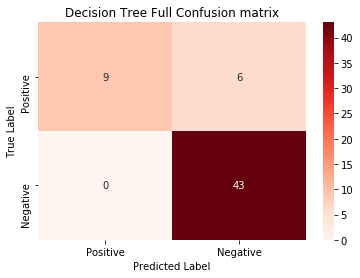

In [215]:
# capture predicted values and mapping them in confusion matrix
predicted = rf_clf.predict(scaledX_test)
print('\n', classification_report(y_test,predicted))
cm_dt = confusion_matrix(y_test,predicted)
class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm_dt, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap="Reds")
plt.title("Decision Tree Full Confusion matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show

In [216]:
# Testing the above model using cross validation for different random state.
from sklearn.model_selection import cross_val_score
score_rf = cross_val_score(rf_clf, scaledX_train, y_train, cv=10, scoring='accuracy')
print("\033[1mAverage train accuracy achieved using RandomForestClassifier model: %1.2f percent" %(rf_clf.score(scaledX_train, y_train)*100))
print("\033[1mAverage test accuracy achieved using RandomForestClassifier model: %1.2f percent" %(np.mean(score_rf)*100))

Average train accuracy achieved using RandomForestClassifier model: 100.00 percent
Average test accuracy achieved using RandomForestClassifier model: 91.76 percent


In [217]:
#Checking variance and bias error
trainscore_rf = np.round(rf_clf.score(scaledX_train, y_train)*100, decimals=3)
avgscore_rf = np.round(np.mean(score_rf)*100, decimals=3)
ve_rf = np.round(np.std(score_rf)*100, decimals=3)
be_rf = np.round((1-np.mean(score_rf))*100, decimals=3)
print("\033[1mUsing RandomForest Classifier:")
print("\033[1mVariance Error: %1.3f" %np.std(score_rf))
print("\033[1mBias Error :%1.3f" %(1-np.mean(score_rf)))

Using RandomForest Classifier:
Variance Error: 0.040
Bias Error :0.082


In [218]:
#Checing the features that are treated importance by our DT regularized model
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf_clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
6,spread1,0.152
7,spread2,0.132
0,MDVP:Fo(Hz),0.121
8,D2,0.108
11,log_MDVP:Fhi,0.085
5,DFA,0.077
9,log_NHR,0.062
2,MDVP:Shimmer,0.061
3,HNR,0.061
10,log_MDVP:PPQ,0.052


#### Inference:
* As seen above feature importance, random forest technique are better as it considers all the features for classification purpose.

In [221]:
#fit score: difference between training accuracy and test accuracy
fit_dt_full = trainscore_dt_full - avgscore_dt_full
fit_dt_reg = trainscore_dt_reg - avgscore_dt_reg
fit_rf = trainscore_rf - avgscore_rf

data = {'DT Full': [trainscore_dt_full, avgscore_dt_full, fit_dt_full, ve_dt_full,be_dt_full ],
        'DT Regularized': [trainscore_dt_reg, avgscore_dt_reg, fit_dt_reg, ve_dt_reg,be_dt_reg ],
        'RandomForest': [trainscore_rf, avgscore_rf, fit_rf, ve_rf,be_rf ],
        }
df = pd.DataFrame (data, index = ['Average train score%','Average test score%', 'fit score%', 'Bias Error%','Variance Error%'])
df

,DT Full,DT Regularized,RandomForest
Average train score%,100.000,96.241,100.000
Average test score%,85.055,87.967,91.758
fit score%,14.945,8.274,8.242
Bias Error%,7.387,7.803,3.993
Variance Error%,14.945,12.033,8.242


#### Inference:
* With random forest we achieve better fit model compared to decision tree model.
* We also achieve better score in terms of bias error and variance error for random forest ensemble method.

### Thank YOU